In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import pickle

In [76]:
sns.set_style('darkgrid') # darkgrid, white grid, dark, white and ticks
sns.set_color_codes('dark')
plt.rc('axes', titlesize=30)     # fontsize of the axes title
plt.rc('axes', labelsize=25)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=25)    # fontsize of the tick labels
plt.rc('ytick', labelsize=25)    # fontsize of the tick labels
plt.rc('legend', fontsize=25)    # legend fontsize
plt.rc('lines', linewidth=1.5)
plt.rc('font', size=25)          # controls default text sizes

In [11]:
model_folder={'M1':'CNN9','M2':'CNN11','M3':'CNN_f5','M4':'SA','M5':'SA3'}
subjects={'1':'2','2':'3','3':'4','4':'5','5':'6','6':'7','7':'8','8':'10','9':'ARL01'}
#subjects={'1':'1','2':'2','3':'3','4':'4','5':'5','6':'6','7':'7','8':'8','9':'9'}
model_names={'M1':'CNN  (1s)(v)','M2':'CNN (1s) (vl)','M3':'CNN (0.5s)(vl)','M4':'Self Attention (1s) (v)','M5':'Self Attention (1s) (vl)'}

In [53]:
df={'speed':[],'model':[],'subject':[],'speeds':[],'rmse':[]}
for key in model_folder.keys():
    for sub in subjects.keys():
        file_path=f'../Paper_results/{model_folder[key]}/subject{subjects[sub]}.pickle'
        with open(file_path,'rb') as f:
            data=pickle.load(f)
        for i in range(len(data['speed'])):
            df['speed'].append(data['speed'][i])
            df['model'].append(model_names[key])
            df['subject'].append(sub)
            df['speeds'].append(data['speeds'][i])
            df['rmse'].append(data['rmse'][i])
        


In [54]:
d=pd.DataFrame(df)
print(d.head())
print(d.rmse.mean())

   speed         model subject  \
0   0.98  CNN  (1s)(v)       1   
1   1.48  CNN  (1s)(v)       1   
2   1.25  CNN  (1s)(v)       1   
3   0.98  CNN  (1s)(v)       1   
4   1.48  CNN  (1s)(v)       1   

                                              speeds      rmse  
0  [0.9375678, 0.9690473324568696, 0.958642184113...  0.017431  
1  [1.4439765, 1.440250271974608, 1.4464641543258...  0.021359  
2  [1.1968876, 1.2104353913965151, 1.227024736078...  0.015534  
3  [0.9860314, 0.9790343157080716, 0.991656848204...  0.012324  
4  [1.4470053, 1.459266662597656, 1.4551396389485...  0.022404  
0.0377722092536662


0.03352130709057417 0.03628040630129519


In [52]:
print(d['rmse'][(d.subject=='6') & (d.model=='CNN (0.5s)(vl)')] )


273    0.046973
274    0.016861
275    0.018030
276    0.050035
277    0.013688
278    0.013911
279    0.016475
280    0.015058
281    0.011050
282    0.015211
Name: rmse, dtype: float64


In [55]:
d=d.drop(labels=[61,145,230,315,400,368,283,29,114,198,128,383,505,399,82,187,293,240,135,346,452,488,170],axis=0)

In [61]:
d=d.drop(labels=[502,440,465,492,512,423,408,412,393,383,356,353,29,56,66,81,85,194,175,165,138,113,222,247,274,284,299,296,303,521],axis=0)

<AxesSubplot:xlabel='subject', ylabel='rmse'>

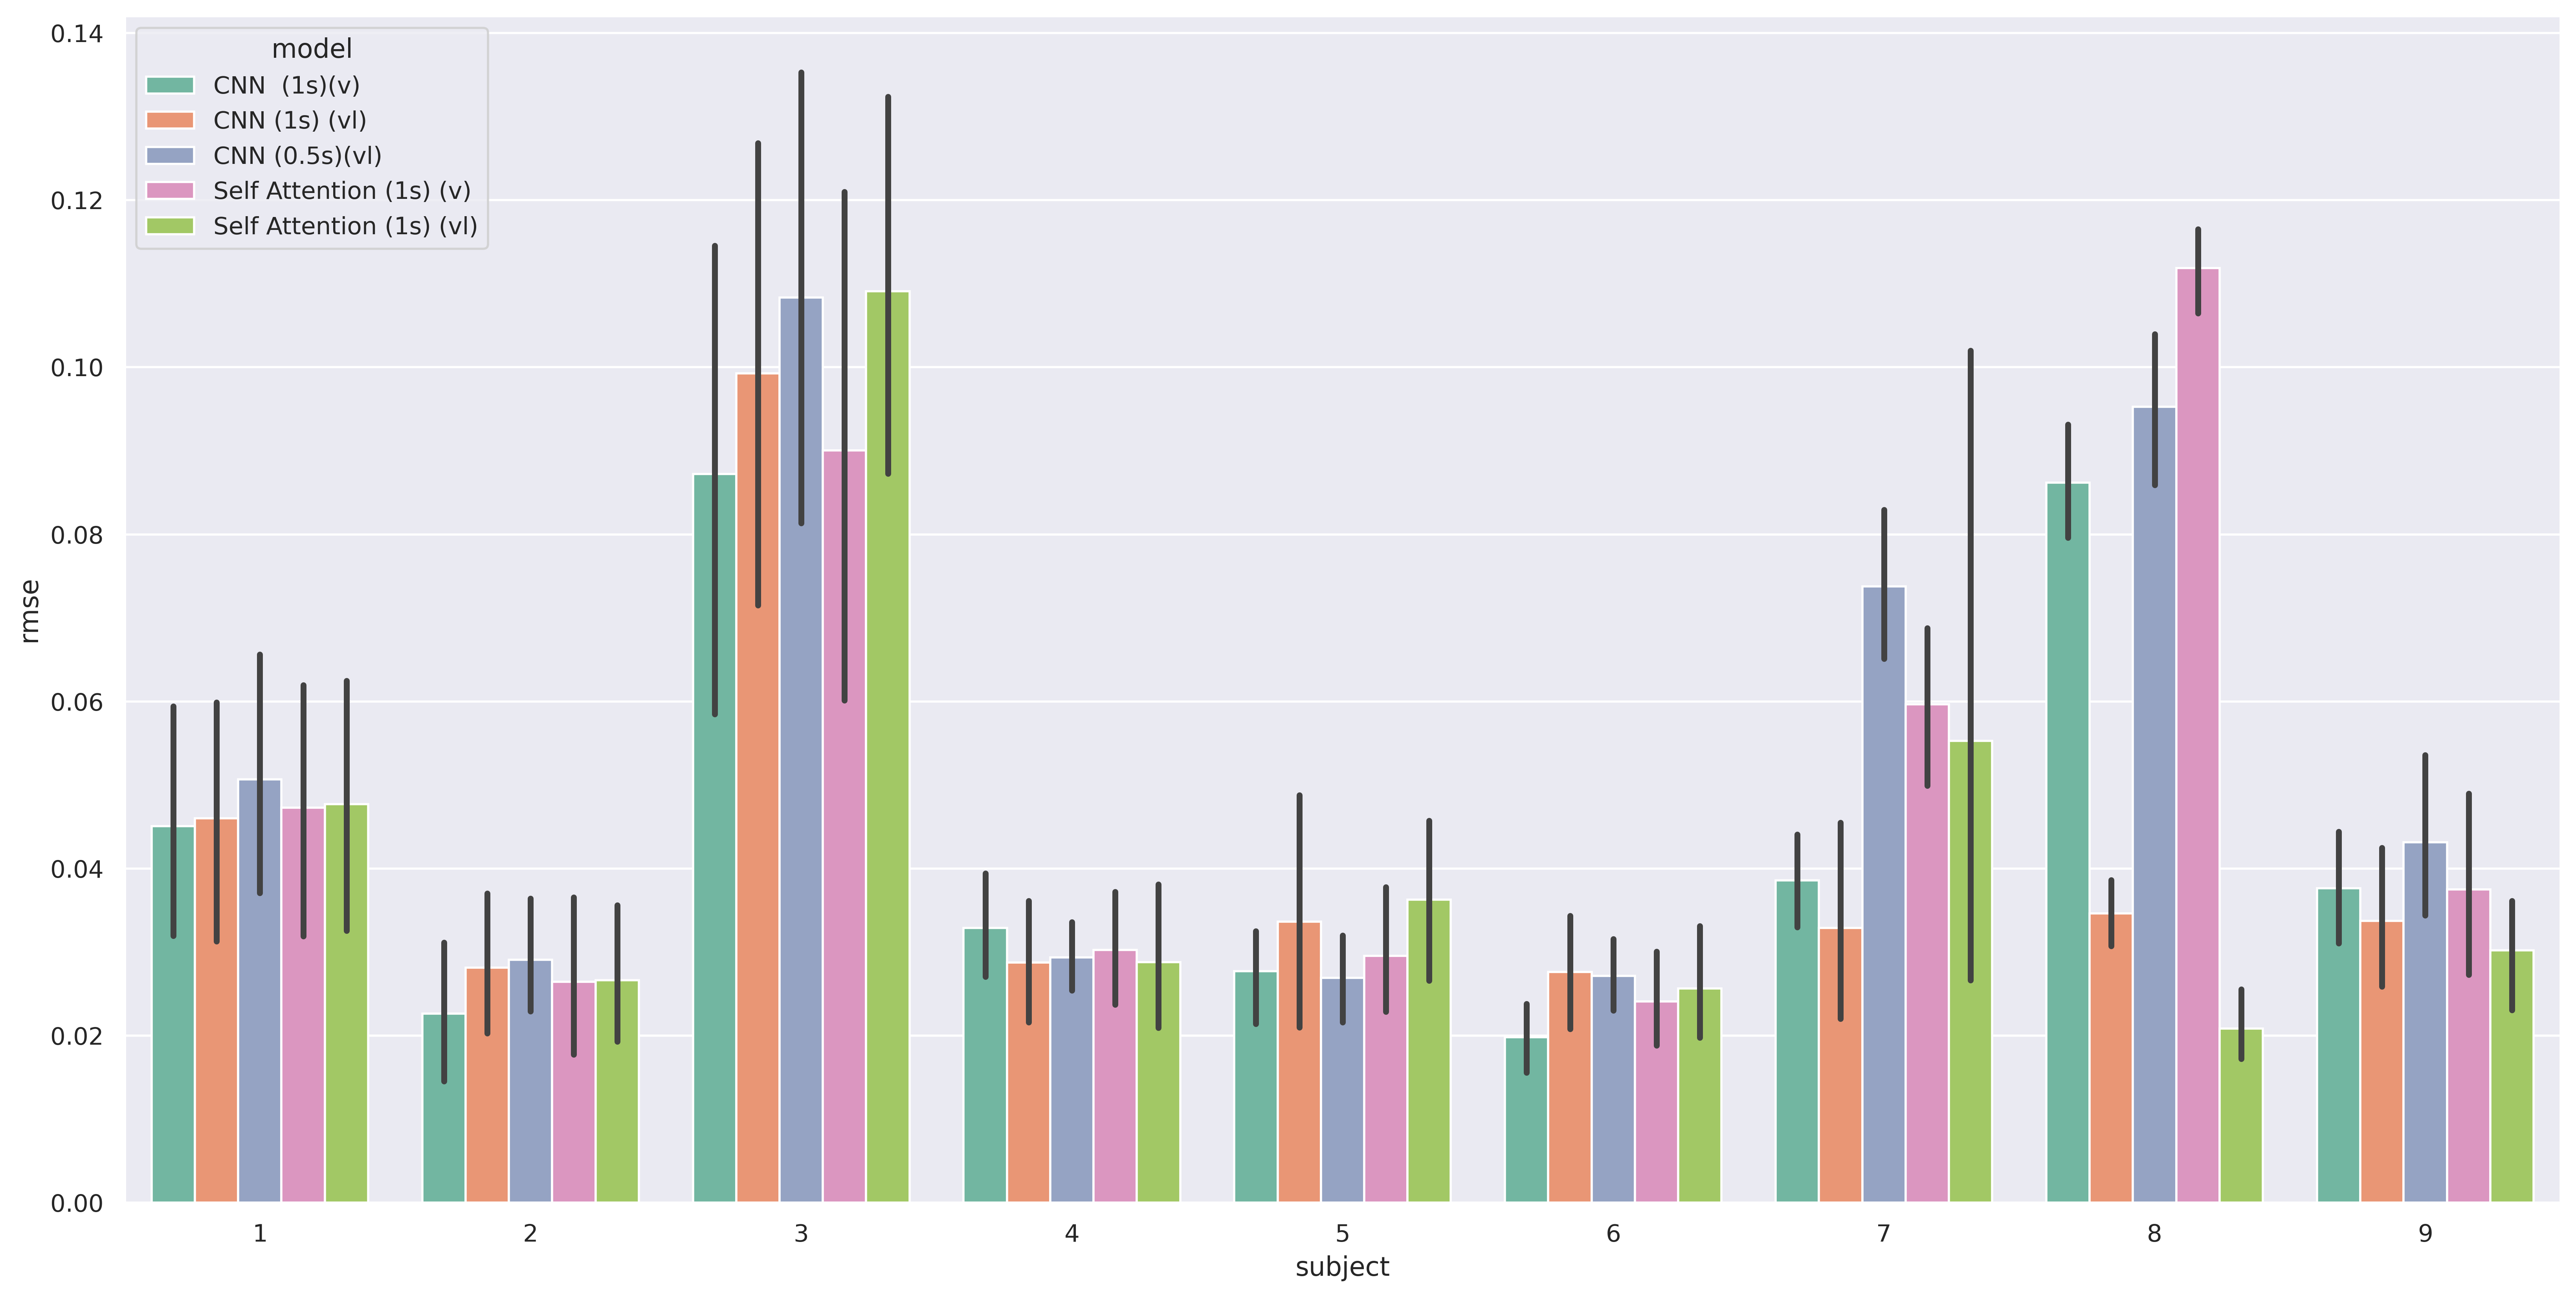

In [62]:
sns.set_theme(rc={"figure.dpi": 400,'figure.figsize':(20,10)})
df=pd.DataFrame(df)
sns.barplot(x='subject',y='rmse',data=d,hue='model',palette='Set2')

In [61]:
d.to_csv('../Paper_results/Final_results.csv',index=False)

Text(0.5, 1.0, 'RMSE for different models')

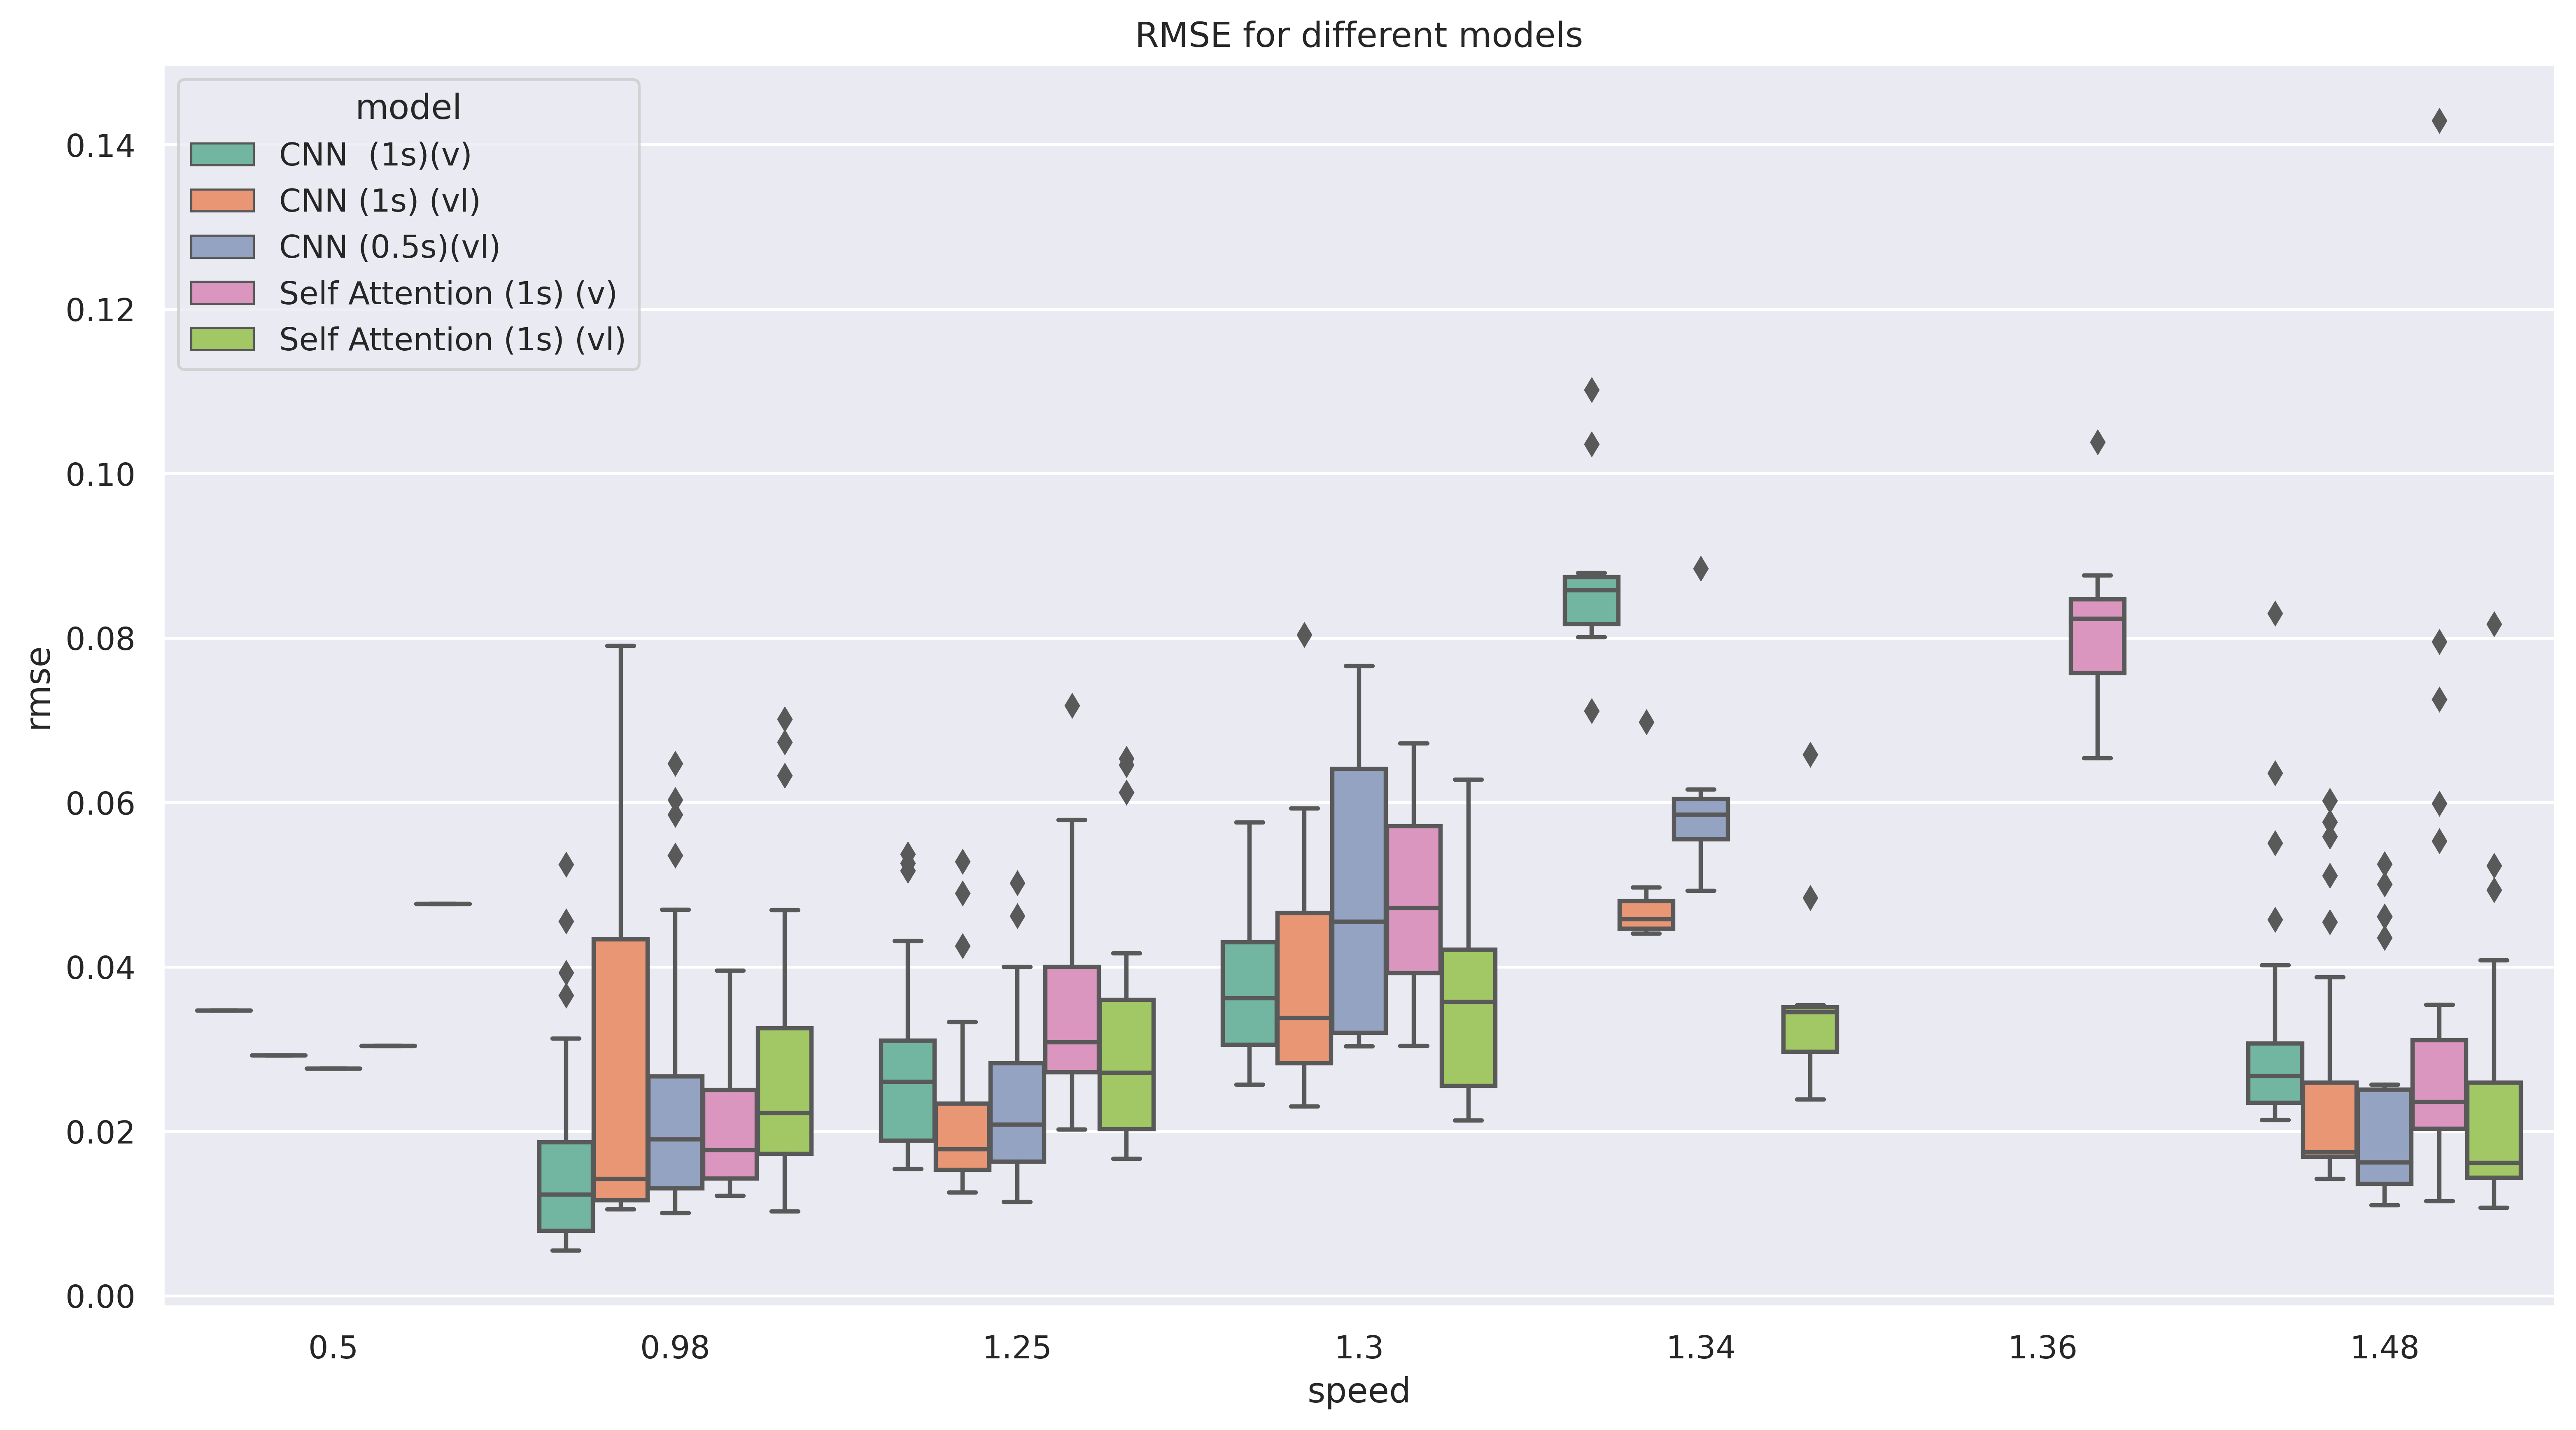

In [99]:
sns.set_theme(rc={"figure.dpi": 500,'figure.figsize':(15,8)})
#df=pd.DataFrame(df)
sns.boxplot(x='speed',y='rmse',data=d,hue='model',palette='Set2').set_title('RMSE for different models')

In [65]:
d.to_csv('../Paper_results/Final_results_peaks.csv',index=False)

In [100]:
data=pd.read_csv('../Paper_results/Final_results.csv')

In [109]:
sub8=data[data.subject==8]

Text(0.5, 1.0, 'RMSE for different speeds for subject 8')

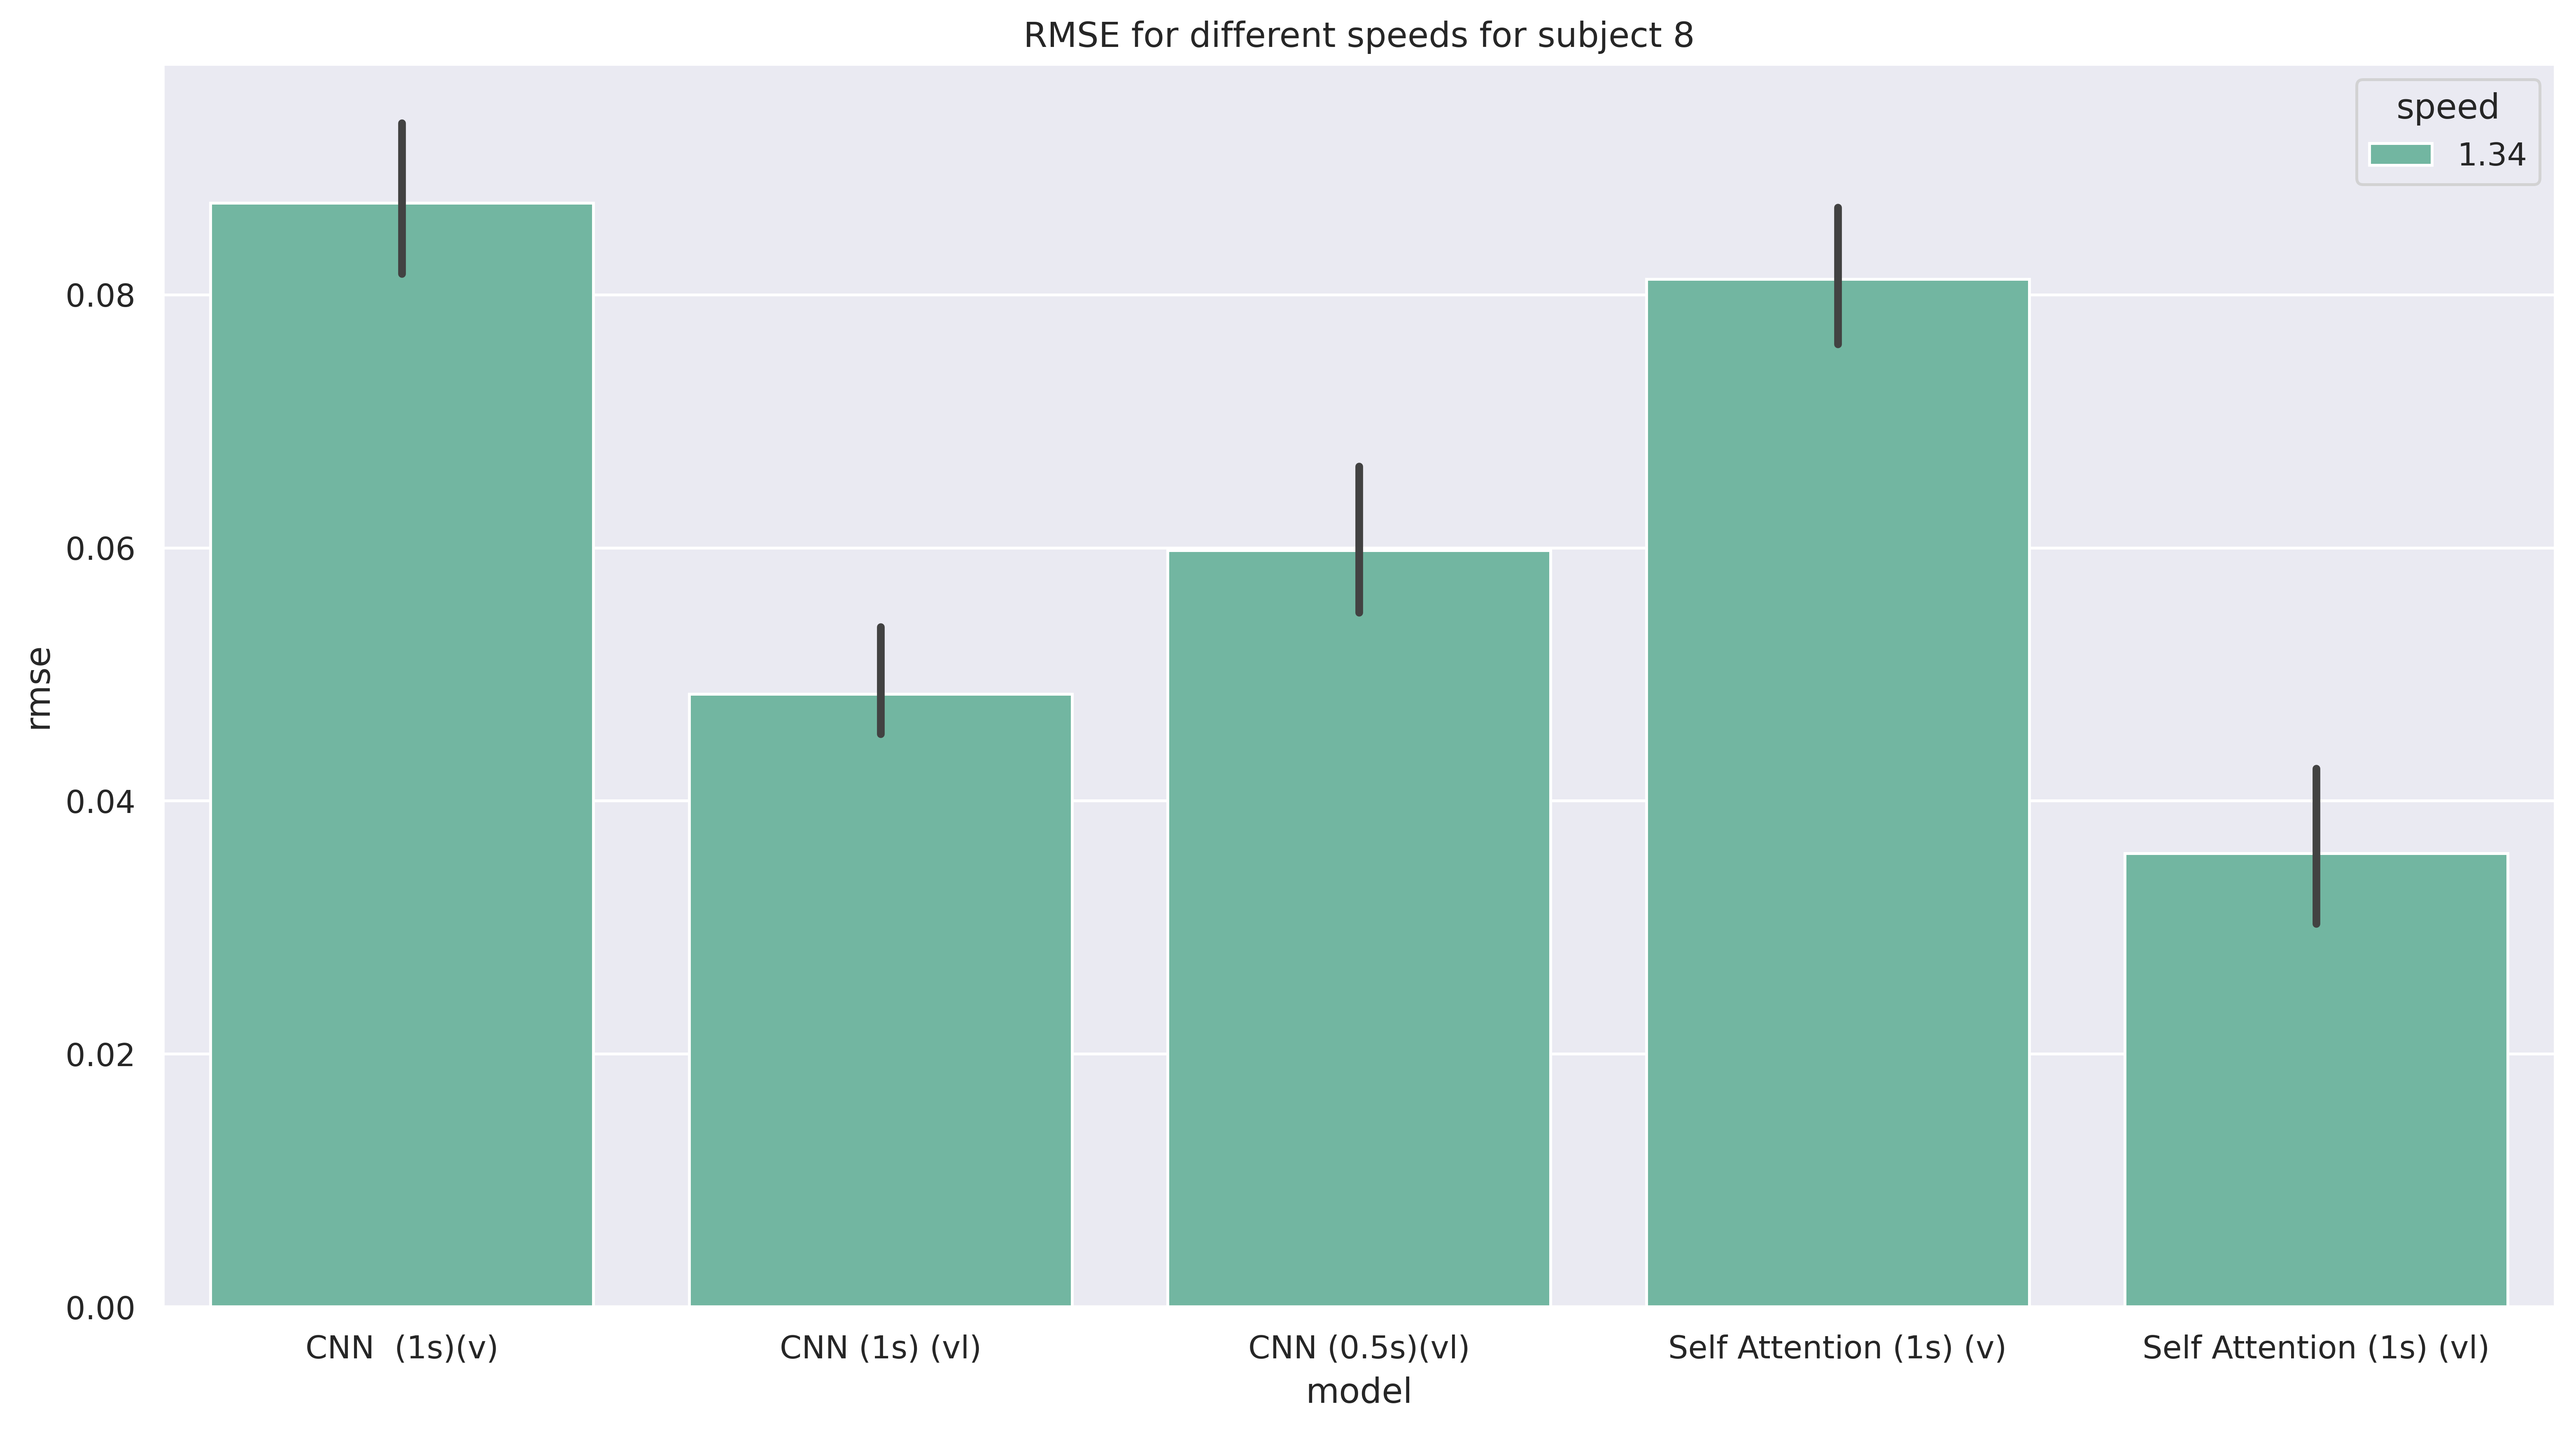

In [111]:
sns.barplot(x='model',y='rmse',data=sub8,hue='speed',palette='Set2').set_title('RMSE for different speeds for subject 8')

Text(0.5, 1.0, 'RMSE for different speeds')

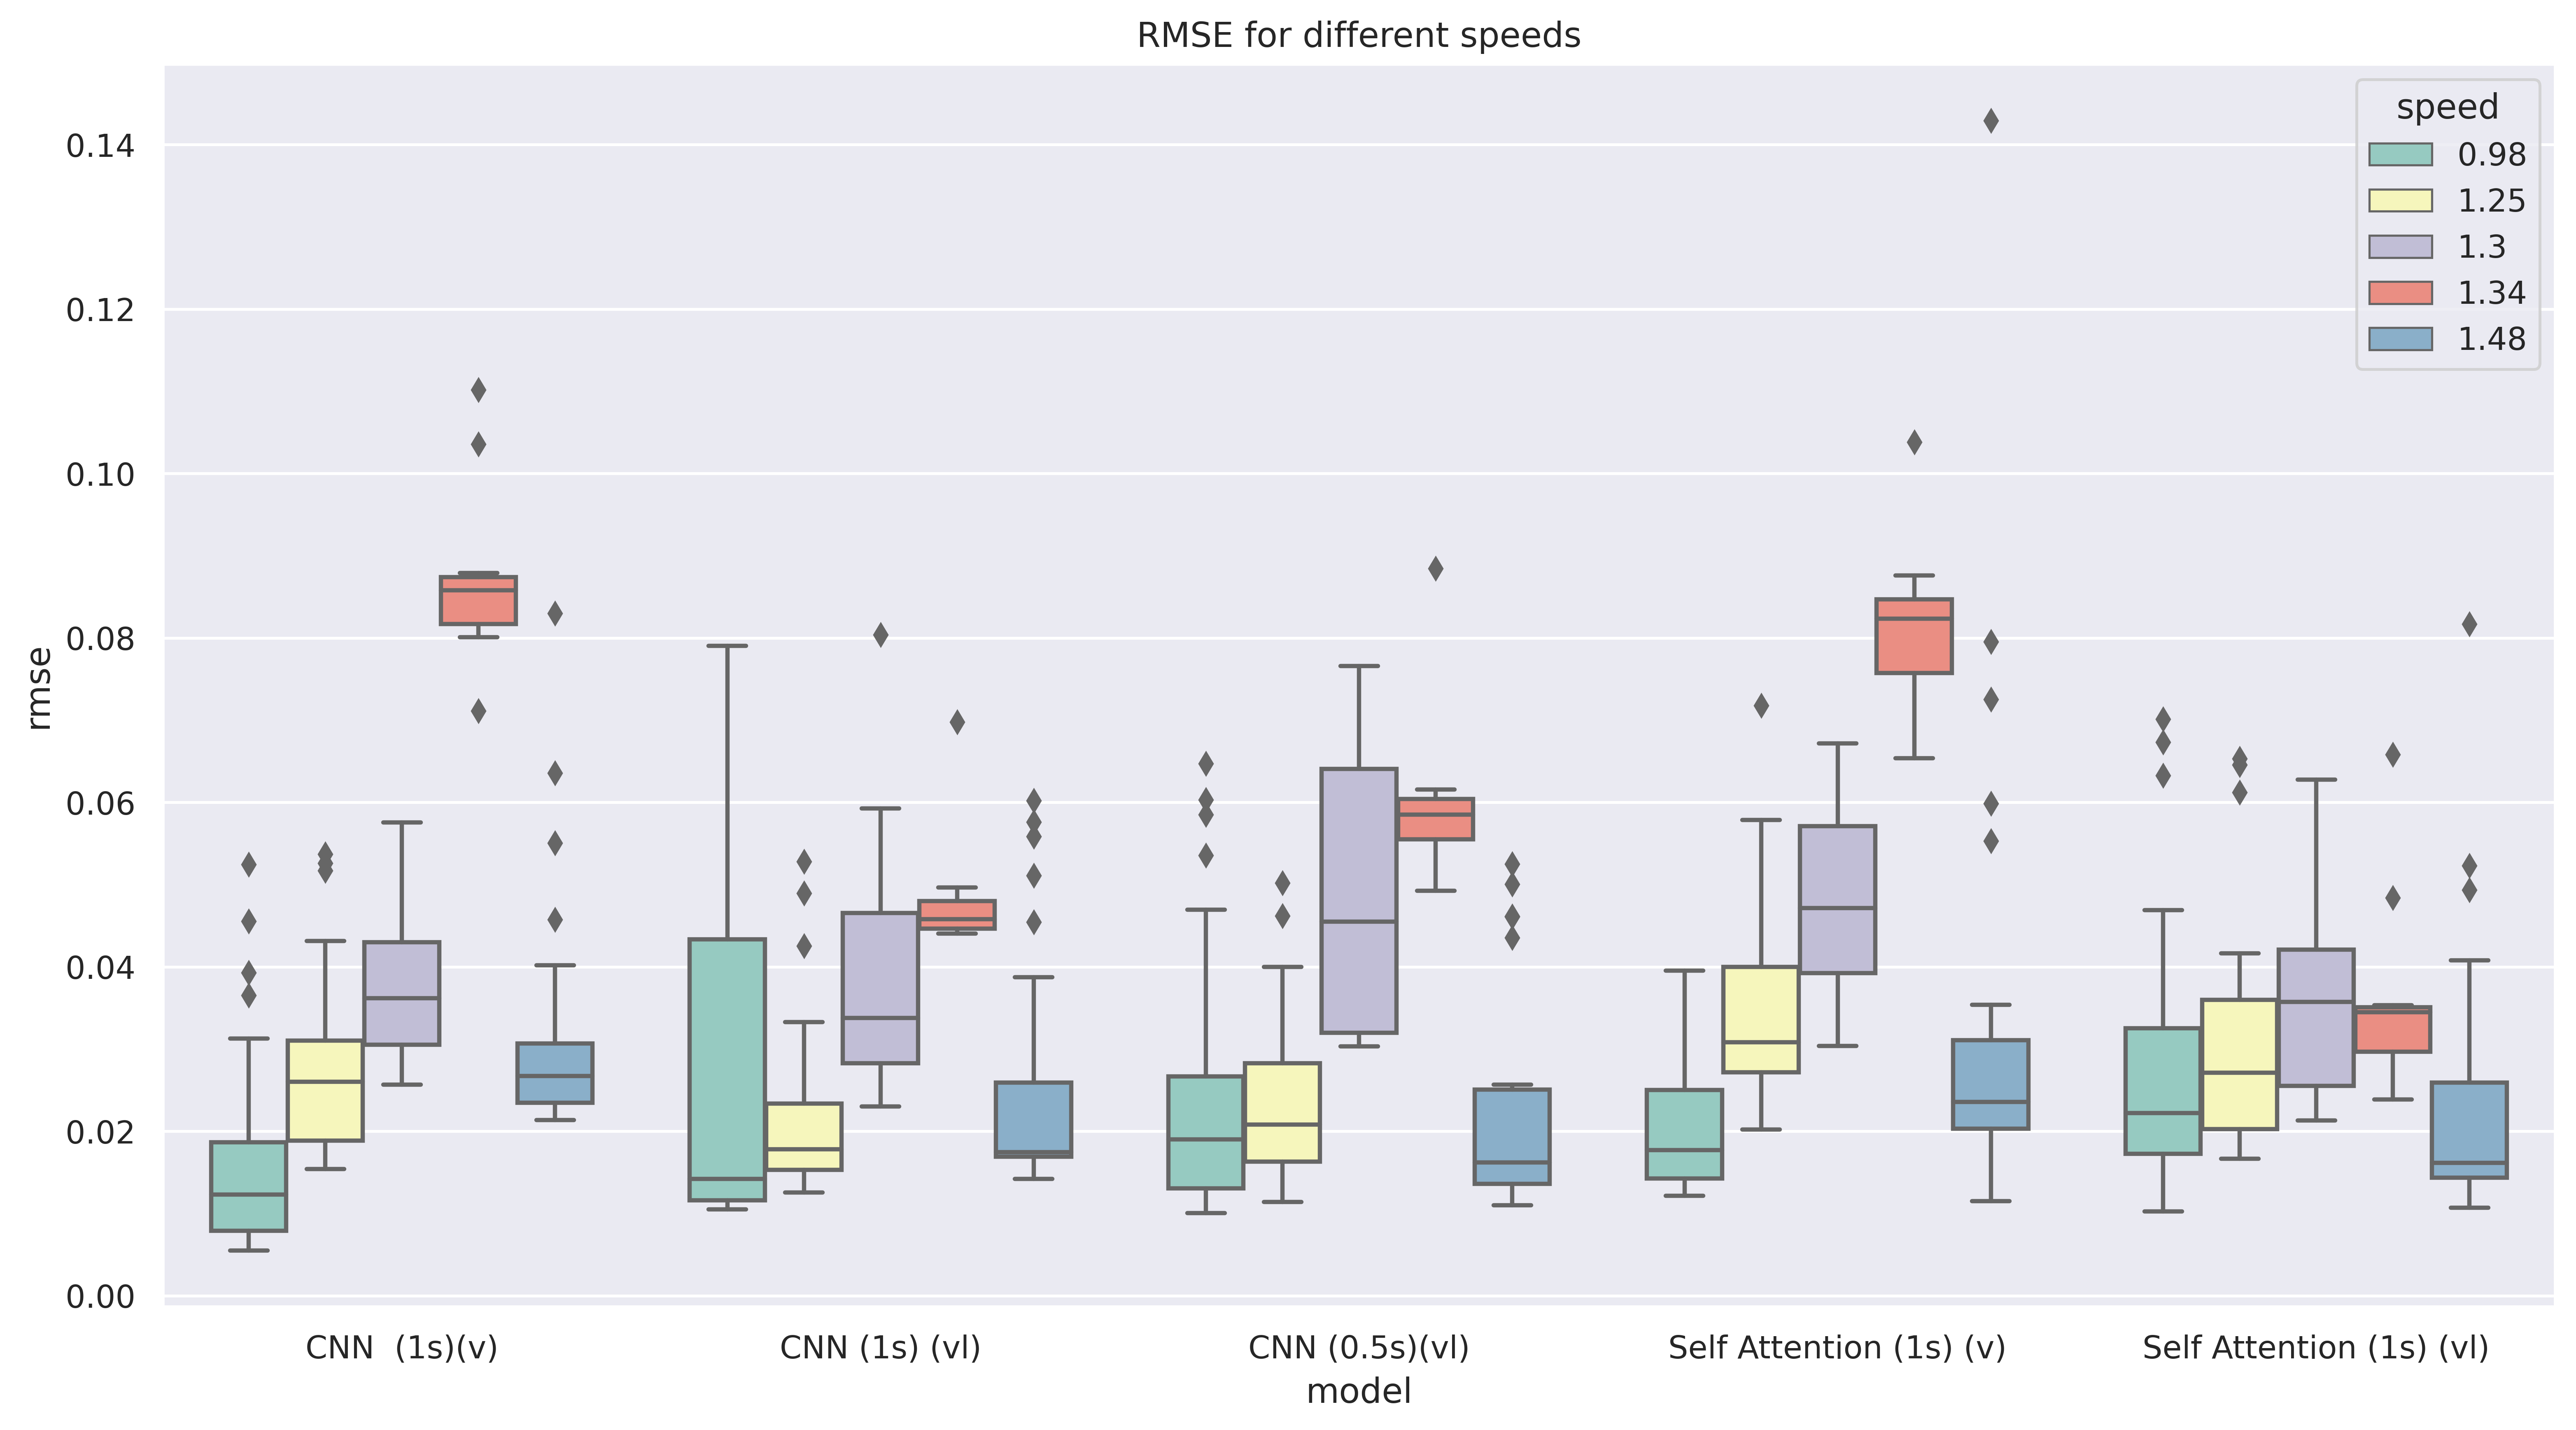

In [106]:
sns.set_theme(rc={"figure.dpi": 500,'figure.figsize':(15,8)})
sns.boxplot(x='model',y='rmse',data=data[data.speed!=0.5],hue='speed',palette='Set3').set_title('RMSE for different speeds')

<AxesSubplot:xlabel='model', ylabel='rmse'>

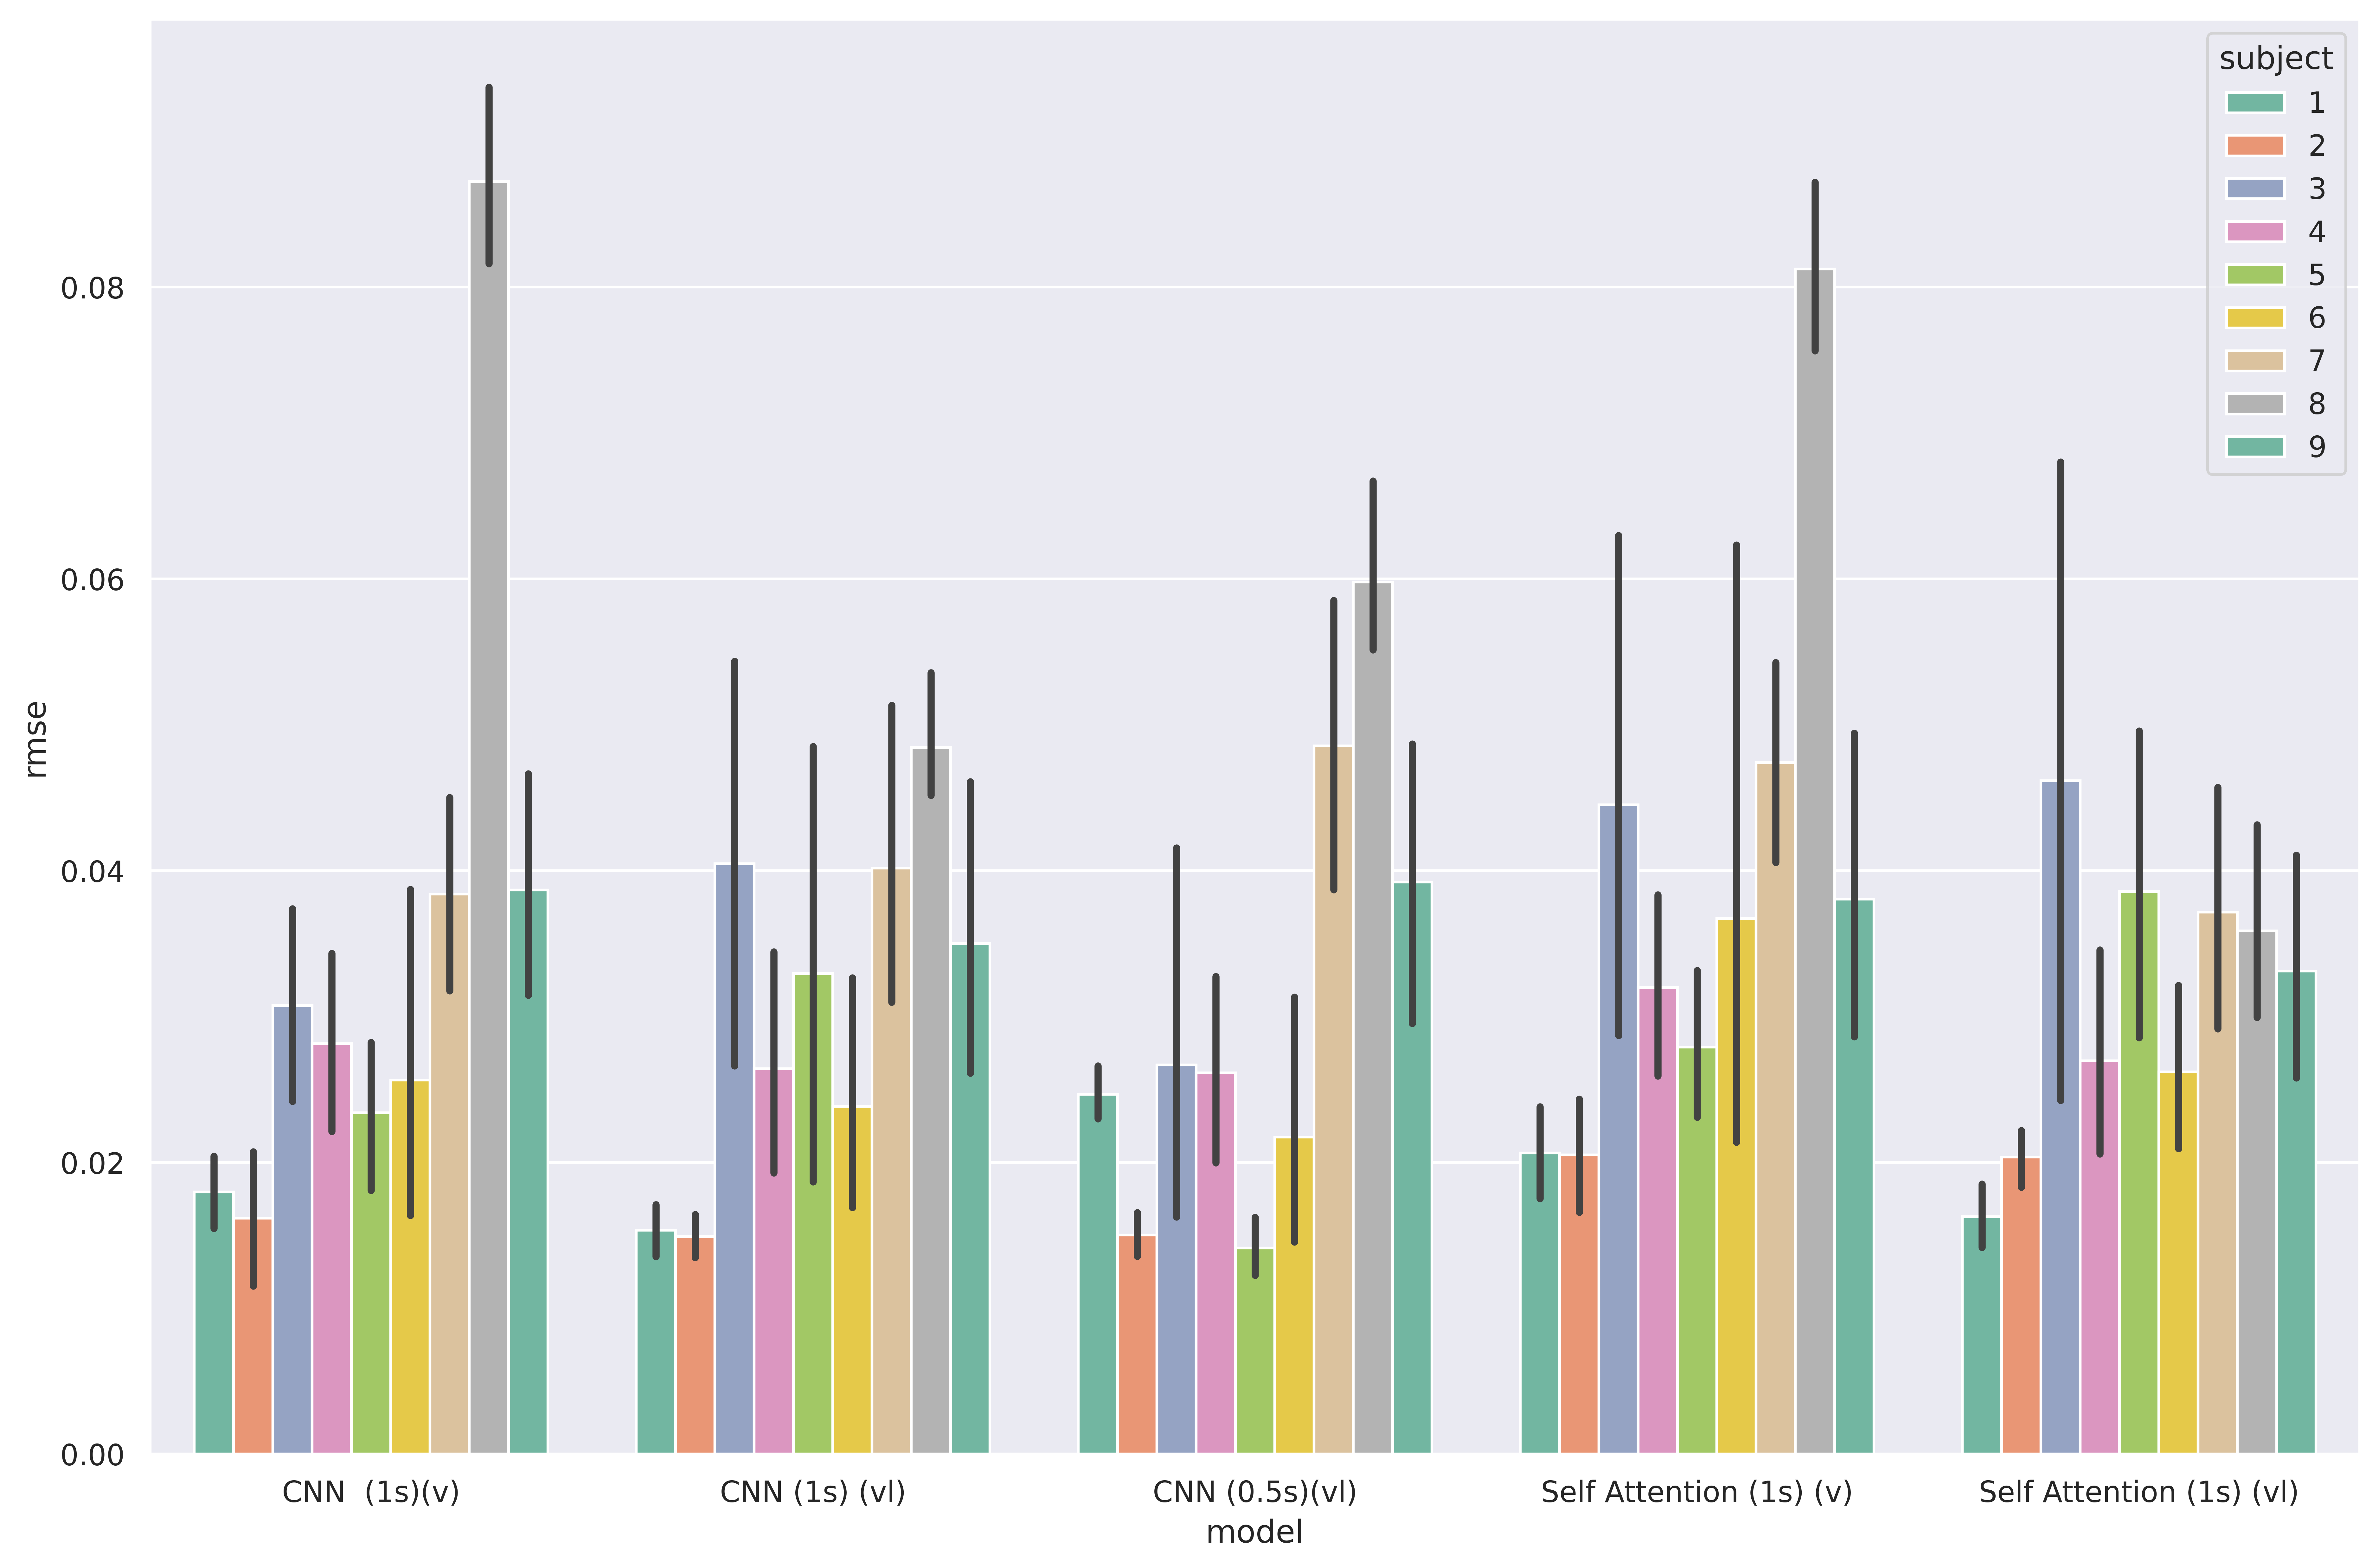

In [85]:
d=pd.read_csv('../Paper_results/Final_results.csv')
sns.set_theme(rc={"figure.dpi": 600,'figure.figsize':(15,10)})

#df=pd.DataFrame(df)
sns.barplot(x='model',y='rmse',data=d,hue='subject',palette='Set2')

Self Attention (1s) (vl)


(1.0, 1.5)

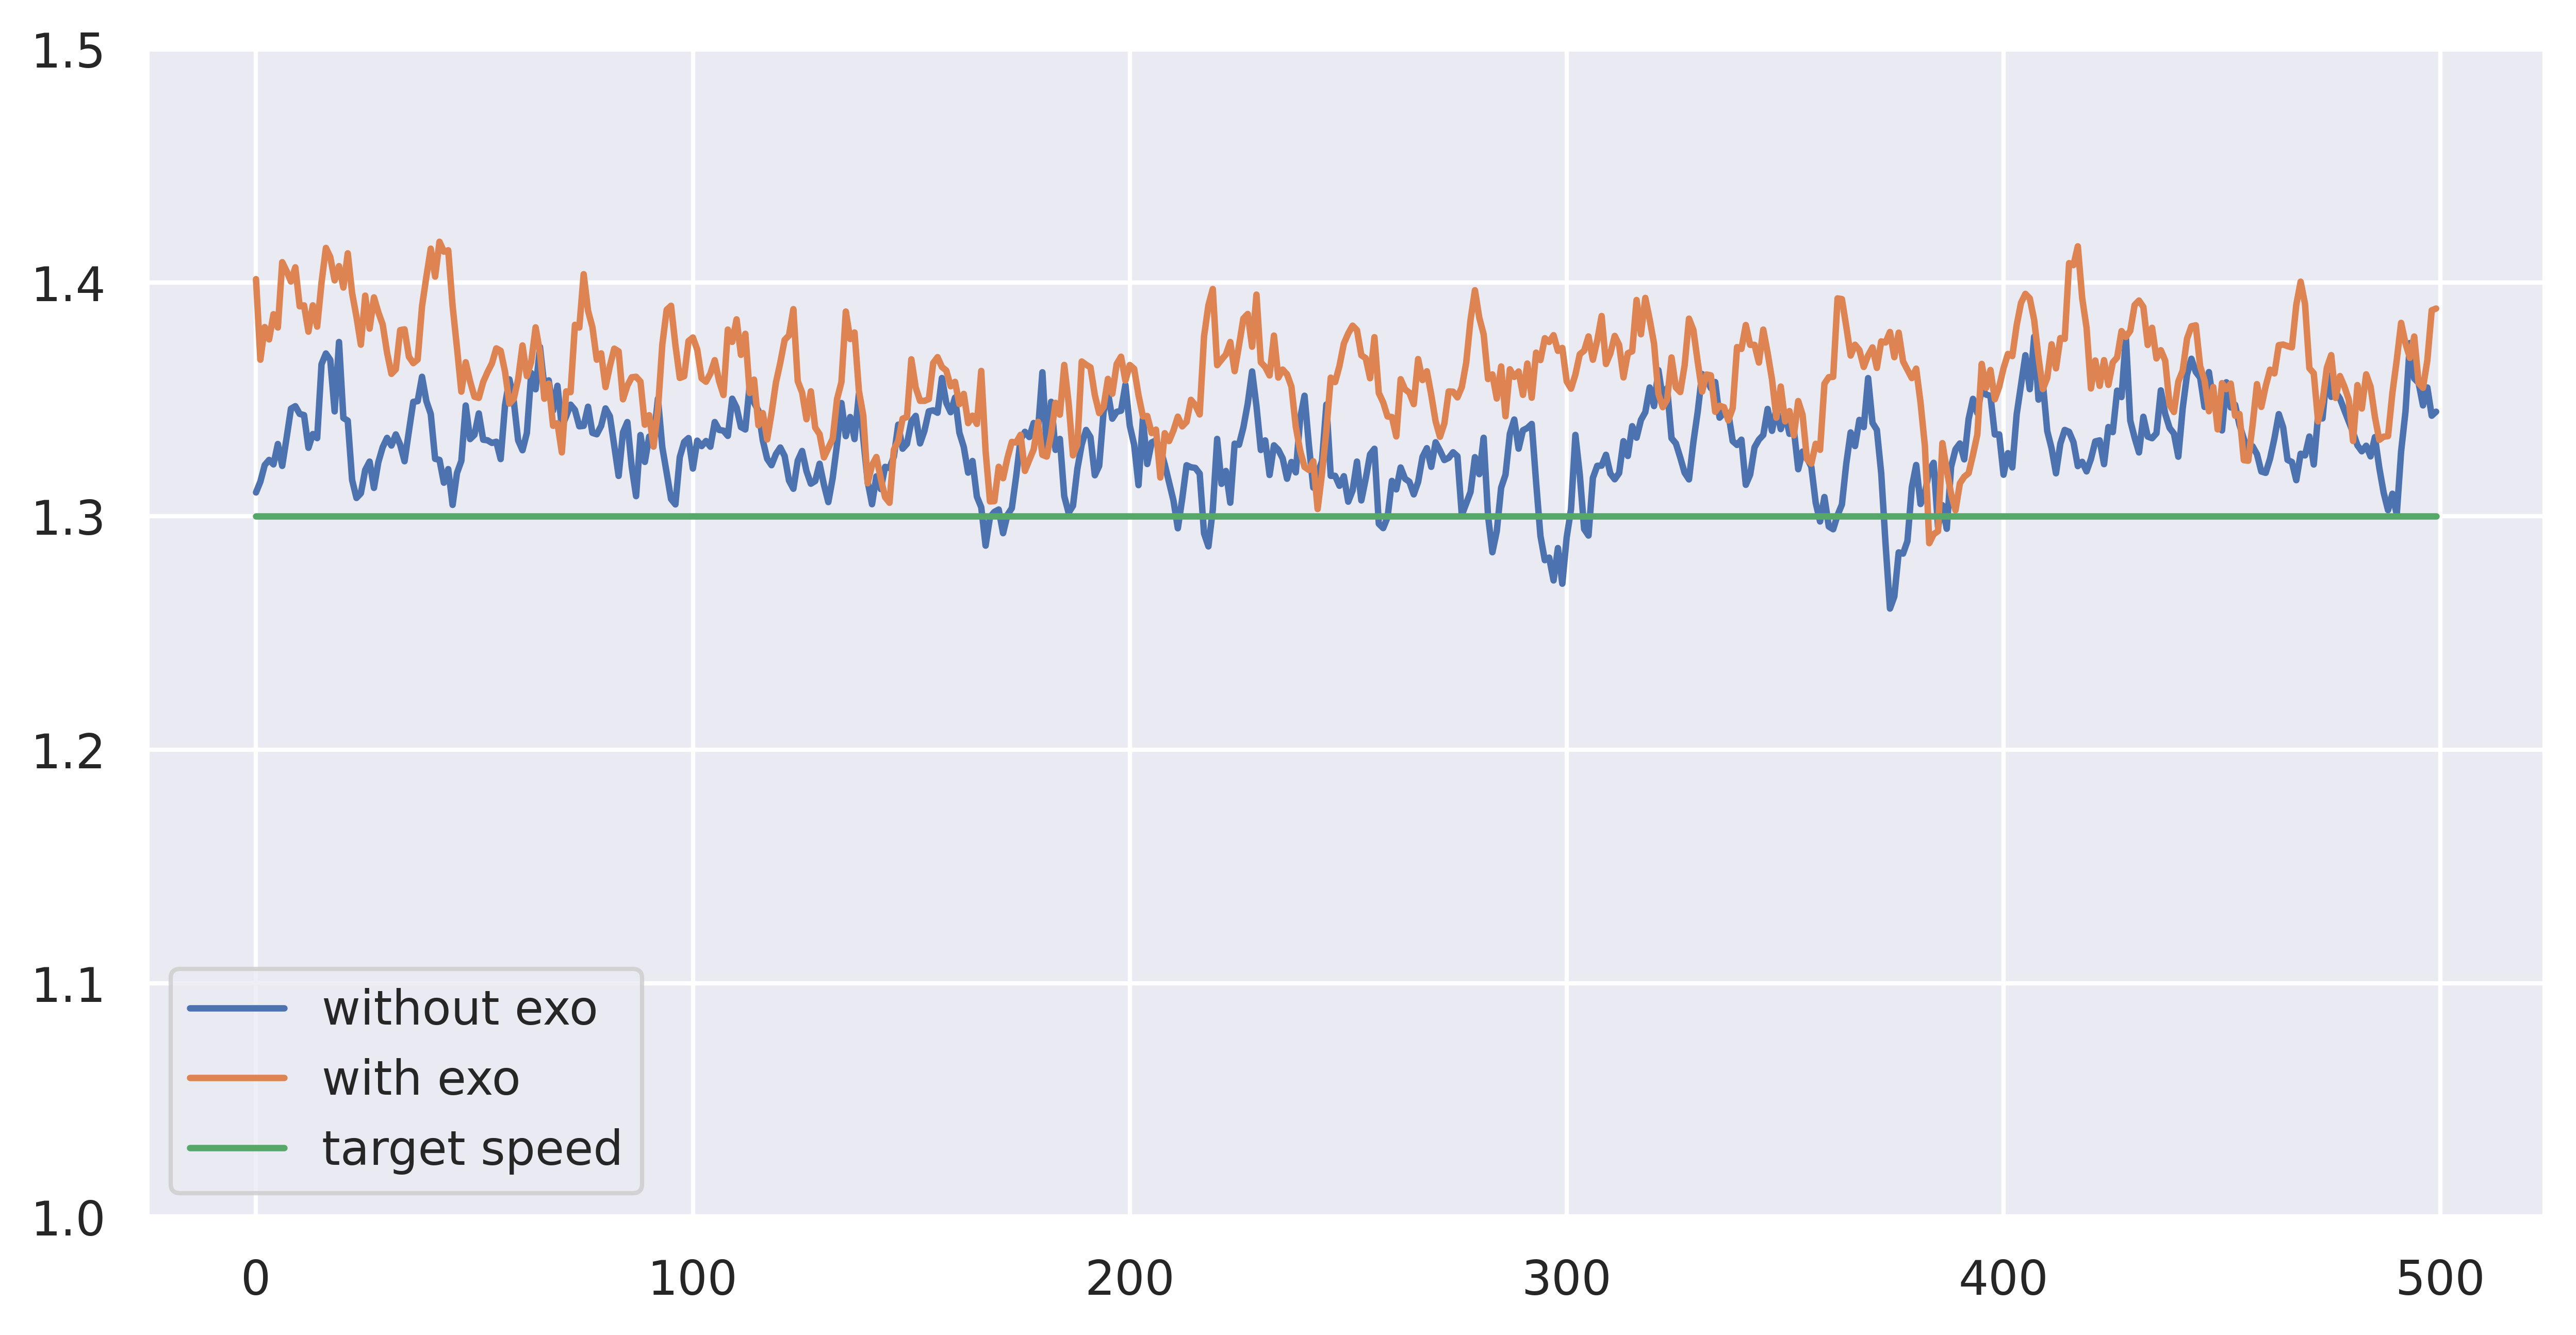

In [74]:
def string_to_list(string):
    string=string[1:-1]
    string=string.split(',')
    string=[float(string[i]) for i in range(len(string))]
    return string
print(d.iloc[474]['model'])
plt.figure(figsize=(10,5))
plt.plot(string_to_list(d.iloc[474]['speeds'])[:500],label='without exo')
plt.plot(string_to_list(d.iloc[477]['speeds'])[:500],label='with exo')
plt.plot(1.3*np.ones(500),label='target speed')
plt.legend()
plt.ylim(1,1.5)

In [39]:
d=pd.read_csv('../Paper_results/Final_results.csv')
print(d[(d.subject==9) & (d.model=='Self Attention (1s) (v)')])
"""
sub 7 - no exo 271,170,71,372,474
sub 8 - no exo 484,381,81,180,281
sub 9 - no exo 301,200,102,505,402
sub 9 - exo 297,196,98,501,398
"""

     speed                    model  subject  \
392   1.25  Self Attention (1s) (v)        9   
393   1.25  Self Attention (1s) (v)        9   
394   0.98  Self Attention (1s) (v)        9   
395   1.48  Self Attention (1s) (v)        9   
396   1.48  Self Attention (1s) (v)        9   
397   1.25  Self Attention (1s) (v)        9   
398   1.25  Self Attention (1s) (v)        9   
399   0.98  Self Attention (1s) (v)        9   
400   0.98  Self Attention (1s) (v)        9   
401   1.48  Self Attention (1s) (v)        9   
402   1.25  Self Attention (1s) (v)        9   

                                                speeds      rmse  
392  [1.2276899, 1.1964584478112155, 1.271451354440...  0.039737  
393  [1.173339, 1.2460334550502687, 1.2311310275761...  0.040925  
394  [0.97121215, 0.9769528910171152, 0.97681582321...  0.038418  
395  [1.4313316, 1.436338698217111, 1.4582751551894...  0.023036  
396  [1.4629291, 1.4428582034369772, 1.433289393042...  0.072517  
397  [1.2317225, 1.17

'\nsub 7 - no exo 271,170,71,372,474\nsub 8 - no exo 484,381,81,180,281\nsub 9 - no exo 301,200,102,505\nsub 9 - exo 297,196,98,501\n'

In [91]:
#train_d=d[[int(d.subject[i])>=7 for i in range(len(d))]]
train_d=d
results=train_d.groupby(['model']).agg({'rmse':['mean','std']})
results.columns=['mean','std']
results=results.reset_index()
#results=results.sort_values(by='subject',ascending=True)
print(results)
results.to_clipboard()

                      model      mean       std
0              CNN  (1s)(v)  0.055270  0.026073
1            CNN (0.5s)(vl)  0.049513  0.016697
2             CNN (1s) (vl)  0.041001  0.015850
3   Self Attention (1s) (v)  0.056081  0.023625
4  Self Attention (1s) (vl)  0.035313  0.012813


<AxesSubplot:xlabel='model', ylabel='mean'>

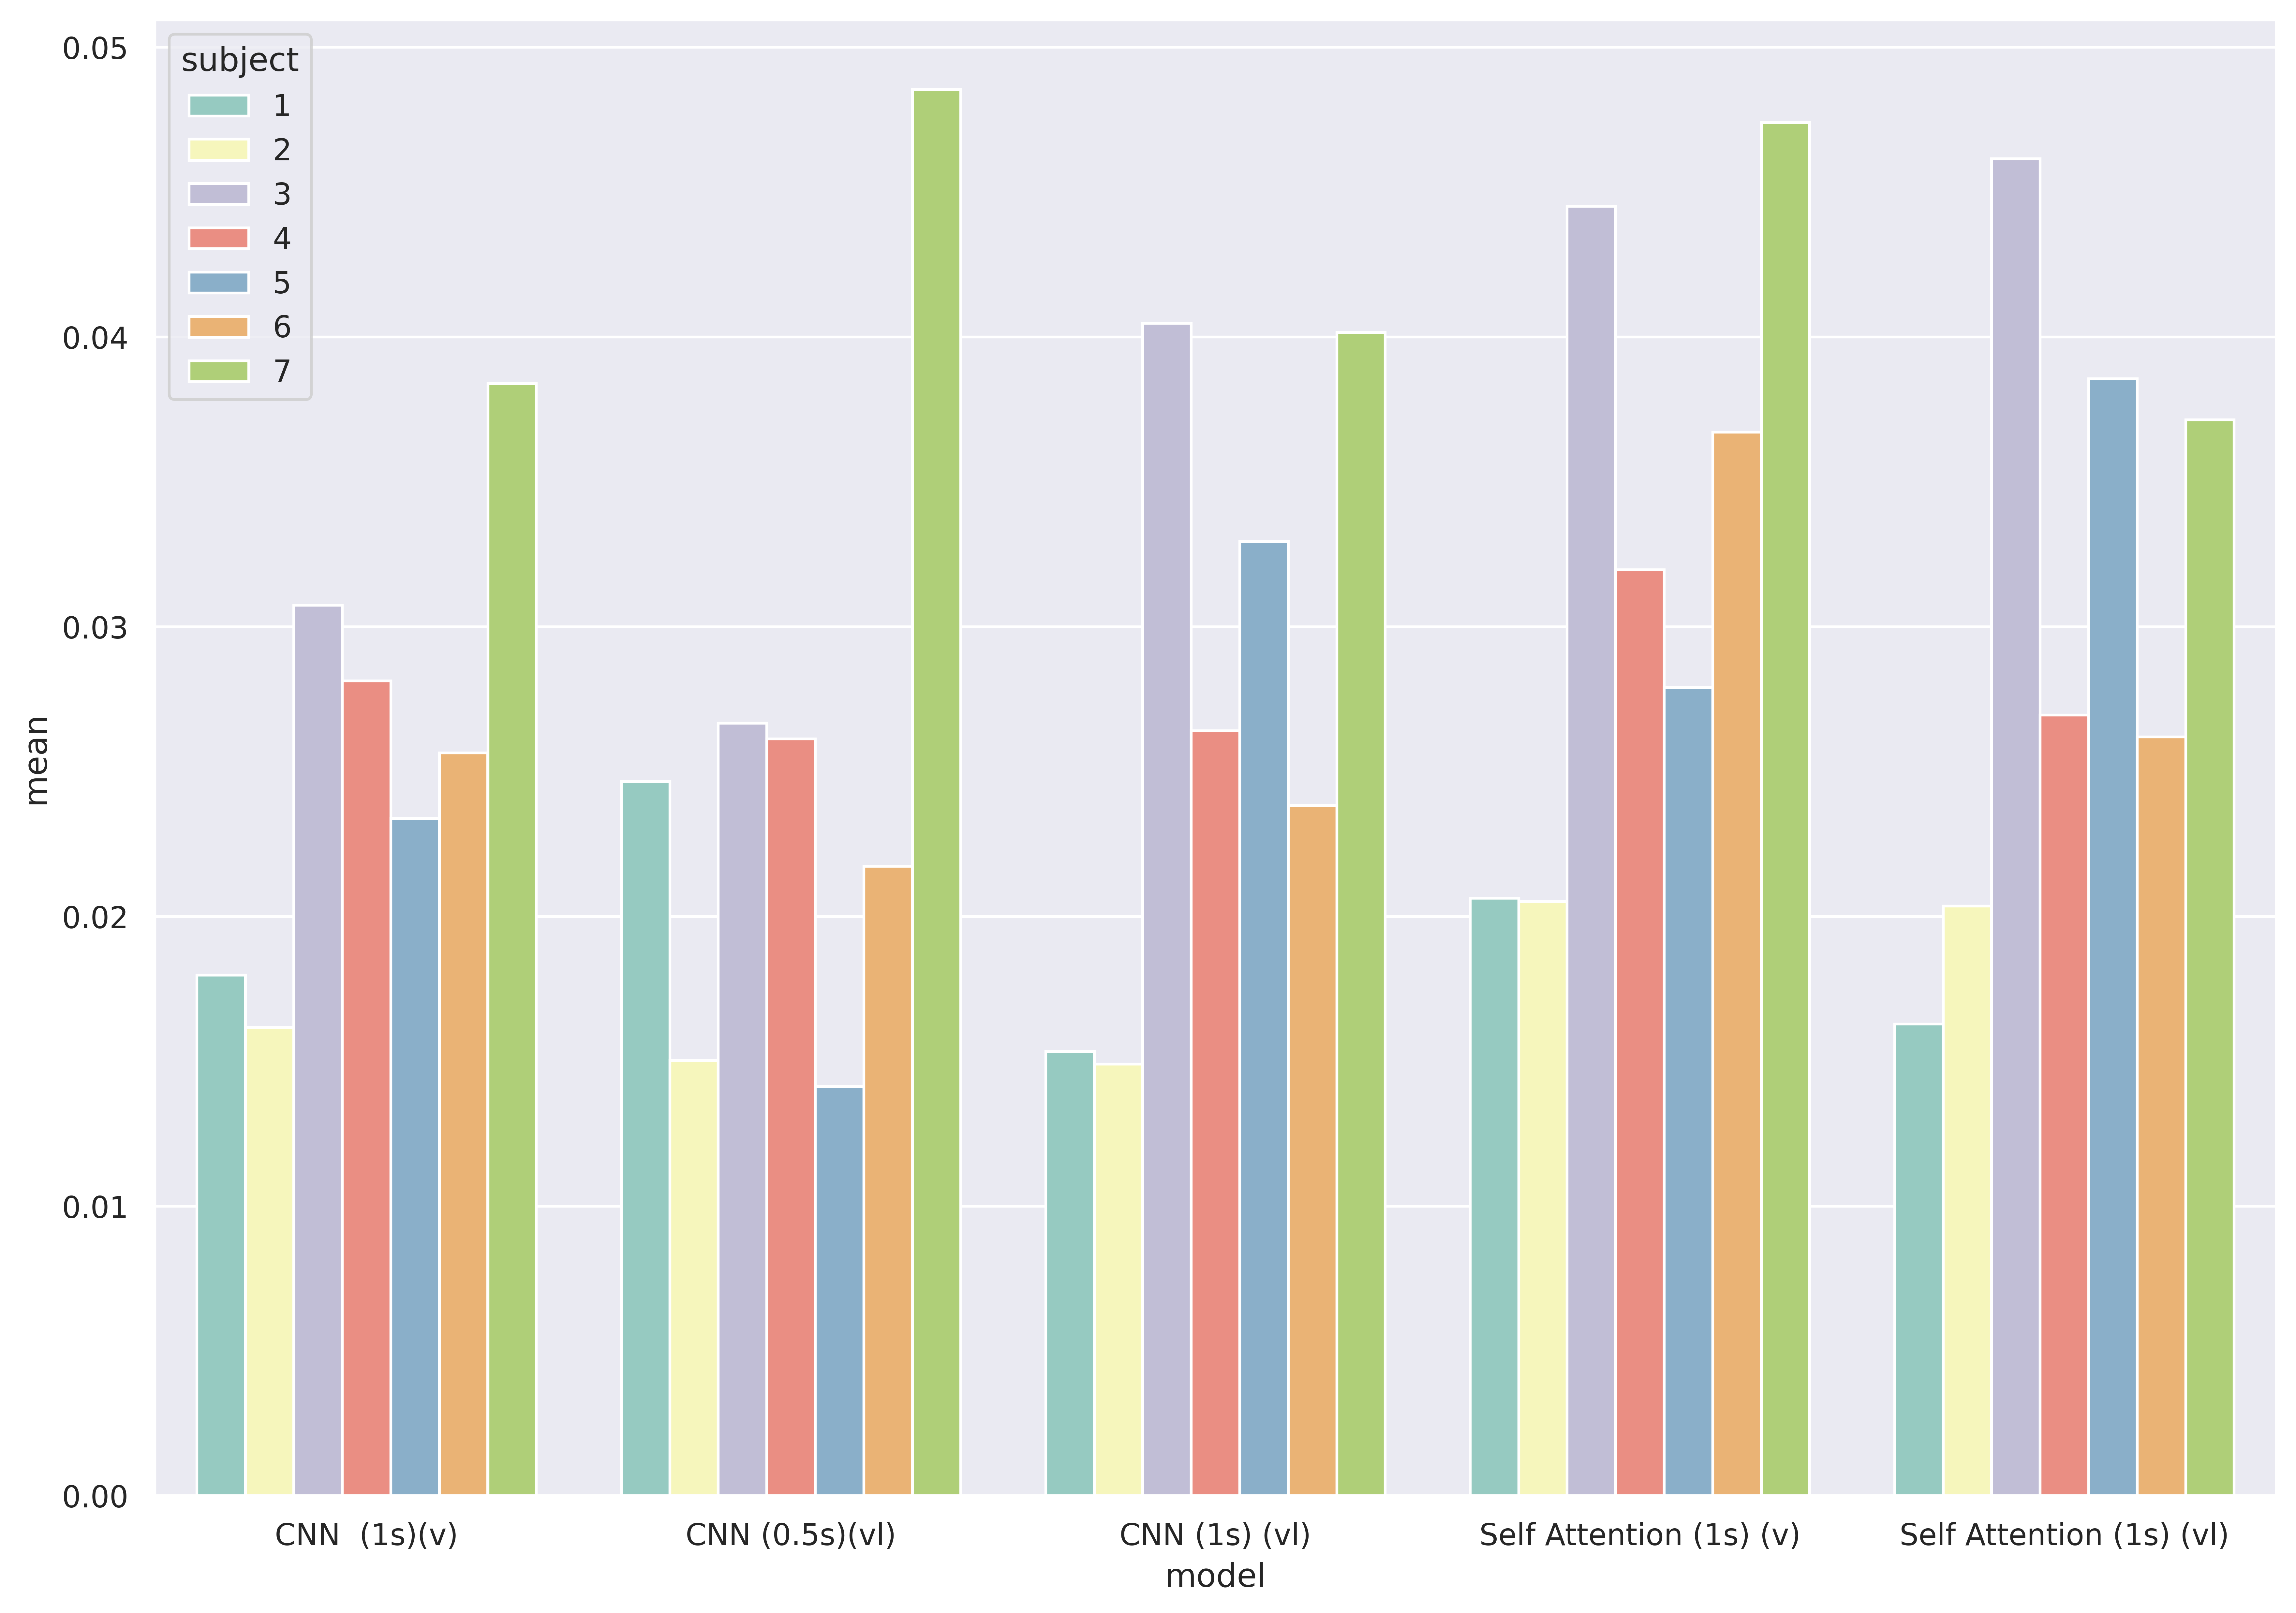

In [20]:
sns.set_theme(rc={"figure.dpi": 600,'figure.figsize':(14,10)})

#df=pd.DataFrame(df)
sns.barplot(x='model',y='mean',data=results,hue='subject',palette='Set3')

In [93]:
data_df=data.groupby(['model','subject']).agg({'rmse':['mean','std']}).reset_index()

In [97]:
print(data[(data.model=='CNN  (1s)(v)') & (data.subject=='4')])

Empty DataFrame
Columns: [speed, model, subject, speeds, rmse]
Index: []


In [39]:
d.to_csv('../Paper_results/Final_results.csv',index=False)